In [ ]:
import numpy as np
import tables
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import sys
sys.path.append('/Users/eframe/repos/dmi/src')
import calibrate as calib
import eventAnalysis as ea
# import compton
import sys
import pandas as pd

In [ ]:
# file = '/Users/eframe/dmi/data/effData/co57_m2_v2.h5'
file = '/Users/eframe/Downloads/hotsph_0deg_comp.h5'
f = tables.open_file( file, 'r' )
time = f.root.EventData.read()['timestamp']
duration = ( time[-1] * 10 ** -8 - time[0] * 10 ** -8 ) # seconds
edata = f.root.EventData.read().view( np.recarray )
edata.rid = np.arange( len( edata ) )
edata = np.sort( edata, order='timestamp' )
i1, i2 = ea.lump_edata( edata, twindow=25 )

In [ ]:
# Getting Energy of Time-Correlated Events
energy = []
for i in np.arange( len(i1) ):
    event =  edata[ i1[i]:i2[i] ]
    
    ev1 = ea.inge1(event)
    ac1 = ea.onAC(ev1)
    dc1 = ea.onDC(ev1)
    
    ev2 = ea.inge2(event)
    ac2 = ea.onAC(ev2)
    dc2 = ea.onDC(ev2)
    
    E1_max = np.max( ( np.sum( ac1['ADC_value'] ), np.sum( dc1['ADC_value'] ) ) )
    E1_min = np.min( ( np.sum( ac1['ADC_value'] ), np.sum( dc1['ADC_value'] ) ) )
    
    E2_max = np.max( ( np.sum( ac2['ADC_value'] ), np.sum( dc2['ADC_value'] ) ) )
    E2_min = np.min( ( np.sum( ac2['ADC_value'] ), np.sum( dc2['ADC_value'] ) ) )
    
    E = E1_max + E2_max
    energy.append( E )
energy = np.array(energy)

In [ ]:
# np.savetxt( '/Users/eframe/dmi/data/effData/co57.txt', energy )
np.savetxt( '/Users/eframe/Downloads/rawdata_ac225.txt', energy )

In [ ]:
evalues = np.loadtxt( '/Users/eframe/Downloads/rawdata_ac225.txt' )
len(evalues) / duration - 183

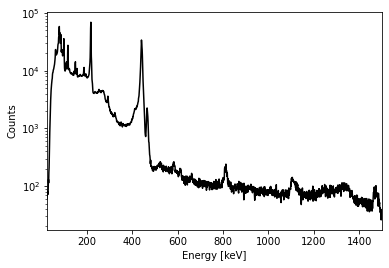

In [2]:
# Plotting Spectrum
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
energies = np.loadtxt( '/Users/eframe/Desktop/rawdata_ac225.txt' )
hist, bins = np.histogram( energies, bins = 1500, range = ( 0,1500 ) )


fig, ax = plt.subplots()
ax.semilogy( bins[:-1], hist, 'k' )
ax.set_xlabel('Energy [keV]')
ax.set_ylabel('Counts')
ax.set_xlim(25,1500)
plt.show()

In [ ]:
## Getting Photopeak Events
E, sig = 122, 3
inside = ( evalues > E - sig ) & ( evalues < E + sig )
left = ( evalues >= E - 2 * sig ) & ( evalues < E - sig )
right = ( evalues >= E + sig ) & ( evalues < E + 2 * sig )
peakcount = len( evalues[inside] )  - len(evalues[right]) - len(evalues[left])

In [ ]:
peakcount / duration

In [ ]:
# # Getting Peak Efficiency from Geant4
# file = '/Users/eframe/geant4py/output/co57_x0y0z205.h5'
# sim_particles = 100000
# E, sig = 122, 2
# src = tables.open_file( file )
# data = pd.DataFrame( src.root.raw.data[:] )
# src.close()

# energy = data.groupby( ['eventID'] )['E'].sum().values
# mask = ( energy >= E - sig ) & ( energy <= E + sig )
# peak_eff = len( energy[mask] ) / sim_particles

In [ ]:
# # Calculating Effective Activity
# branch = 0.86 # 0.86 Co57, 0.85 Cs137, 0.837 U238, 0.572 U235, 0.11 Fr221, 0.26 Bi213
# act = peakcount / ( peak_eff * branch )
# act